In [1]:
#Import required libraries
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [2]:
#Define and load file 
salaries_path = "data/Salaries.csv"
salaries = pd.read_csv(salaries_path)

#Display sample data 
salaries.head()

/var/folders/zq/5_ydv5613ml2p2l82yrw54980000gn/T/ipykernel_45860/1813114643.py:3: DtypeWarning: Columns (3,4,5,6,12) have mixed types. Specify dtype option on import or set low_memory=False.
  salaries = pd.read_csv(salaries_path)


,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.0,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.6,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.0,56120.71,198306.9,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.6,9737.0,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


In [3]:
unique_years = salaries['Year'].unique()
unique_years

array([2011, 2012, 2013, 2014])

In [4]:
df_2011 = salaries[salaries['Year'] == 2014]
df_2011

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
110531,110532,David Shinn,Deputy Chief 3,129150.01,0.0,342802.63,38780.04,471952.64,510732.68,2014,NaN,San Francisco,PT
110532,110533,Amy P Hart,Asst Med Examiner,318835.49,10712.95,60563.54,89540.23,390111.98,479652.21,2014,NaN,San Francisco,FT
110533,110534,William J Coaker Jr.,Chief Investment Officer,257340.0,0.0,82313.7,96570.66,339653.70,436224.36,2014,NaN,San Francisco,PT
110534,110535,Gregory P Suhr,Chief of Police,307450.04,0.0,19266.72,91302.46,326716.76,418019.22,2014,NaN,San Francisco,FT
110535,110536,Joanne M Hayes-White,"Chief, Fire Department",302068.0,0.0,24165.44,91201.66,326233.44,417435.10,2014,NaN,San Francisco,FT
...,...,...,...,...,...,...,...,...,...,...,...,...,...
148649,148650,Roy I Tillery,Custodian,0.00,0.00,0.00,0.00,0.00,0.00,2014,NaN,San Francisco,PT
148650,148651,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,NaN,San Francisco,NaN
148651,148652,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,NaN,San Francisco,NaN
148652,148653,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,NaN,San Francisco,NaN


In [5]:
df_2011.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38123 entries, 110531 to 148653
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Id                38123 non-null  int64  
 1   EmployeeName      38123 non-null  object 
 2   JobTitle          38123 non-null  object 
 3   BasePay           38123 non-null  object 
 4   OvertimePay       38123 non-null  object 
 5   OtherPay          38123 non-null  object 
 6   Benefits          38123 non-null  object 
 7   TotalPay          38123 non-null  float64
 8   TotalPayBenefits  38123 non-null  float64
 9   Year              38123 non-null  int64  
 10  Notes             0 non-null      float64
 11  Agency            38123 non-null  object 
 12  Status            38119 non-null  object 
dtypes: float64(3), int64(2), object(8)
memory usage: 4.1+ MB


In [6]:
df_2011['BasePay'] = pd.to_numeric(df_2011['BasePay'], errors='coerce')
df_2011['OvertimePay'] = pd.to_numeric(df_2011['OvertimePay'], errors='coerce')
df_2011['OtherPay'] = pd.to_numeric(df_2011['OtherPay'], errors='coerce')
df_2011['Benefits'] = pd.to_numeric(df_2011['Benefits'], errors='coerce')

/var/folders/zq/5_ydv5613ml2p2l82yrw54980000gn/T/ipykernel_45860/1490690909.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2011['BasePay'] = pd.to_numeric(df_2011['BasePay'], errors='coerce')
/var/folders/zq/5_ydv5613ml2p2l82yrw54980000gn/T/ipykernel_45860/1490690909.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2011['OvertimePay'] = pd.to_numeric(df_2011['OvertimePay'], errors='coerce')
/var/folders/zq/5_ydv5613ml2p2l82yrw54980000gn/T/ipykernel_45860/1490690909.py:3: SettingWithCopyWarning

In [7]:
num_rows = df_2011.shape[0]
print(f'The number of rows in the 2011 dataframe is : {num_rows}')

The number of rows in the 2011 dataframe is : 38123


In [8]:
nan_count_id = df_2011['Id'].isna().sum()
nan_count_name = df_2011['EmployeeName'].isna().sum()
nan_count_job = df_2011['JobTitle'].isna().sum()
nan_count_base = df_2011['BasePay'].isna().sum()
nan_count_overtime = df_2011['OvertimePay'].isna().sum()
nan_count_other = df_2011['OtherPay'].isna().sum()
nan_count_benefits = df_2011['Benefits'].isna().sum()
nan_count_total = df_2011['TotalPay'].isna().sum()
nan_count_tpb = df_2011['TotalPayBenefits'].isna().sum()
nan_count_year = df_2011['Year'].isna().sum()
nan_count_notes = df_2011['Notes'].isna().sum()
nan_count_agency = df_2011['Agency'].isna().sum()
nan_count_status = df_2011['Status'].isna().sum()

In [9]:
print(f'Total NaN for ID: {nan_count_id}')
print(f'Total NaN for EmployeeName: {nan_count_name}')
print(f'Total NaN for JobTitle: {nan_count_job}')
print(f'Total NaN for BasePay: {nan_count_base}')
print(f'Total NaN for OvertimePay: {nan_count_overtime}')
print(f'Total NaN for OtherPay: {nan_count_other}')
print(f'Total NaN for Benefits: {nan_count_benefits}')
print(f'Total NaN for TotalPay: {nan_count_total}')
print(f'Total NaN for TotalPayBenefits: {nan_count_tpb}')
print(f'Total NaN for Year: {nan_count_year}')
print(f'Total NaN for Notes: {nan_count_notes}')
print(f'Total NaN for Agency: {nan_count_agency}')
print(f'Total NaN for Status: {nan_count_status}')

Total NaN for ID: 0
Total NaN for EmployeeName: 0
Total NaN for JobTitle: 0
Total NaN for BasePay: 4
Total NaN for OvertimePay: 4
Total NaN for OtherPay: 4
Total NaN for Benefits: 4
Total NaN for TotalPay: 0
Total NaN for TotalPayBenefits: 0
Total NaN for Year: 0
Total NaN for Notes: 38123
Total NaN for Agency: 0
Total NaN for Status: 4


In [10]:
agency_is_sf = (df_2011['Agency'] == 'San Francisco').sum()
print(f'The number of rows that contain San Francisco in the Agency column is: {agency_is_sf}')

The number of rows that contain San Francisco in the Agency column is: 38123


In [11]:
df_2011 = df_2011.drop('Notes', axis = 1)
df_2011 = df_2011.drop('Year', axis = 1)
df_2011 = df_2011.drop('Id', axis = 1)
df_2011 = df_2011.drop('EmployeeName', axis = 1)
df_2011 = df_2011.drop('Agency', axis = 1)

In [12]:
df_2011

,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Status
110531,Deputy Chief 3,129150.01,0.00,342802.63,38780.04,471952.64,510732.68,PT
110532,Asst Med Examiner,318835.49,10712.95,60563.54,89540.23,390111.98,479652.21,FT
110533,Chief Investment Officer,257340.00,0.00,82313.70,96570.66,339653.70,436224.36,PT
110534,Chief of Police,307450.04,0.00,19266.72,91302.46,326716.76,418019.22,FT
110535,"Chief, Fire Department",302068.00,0.00,24165.44,91201.66,326233.44,417435.10,FT
...,...,...,...,...,...,...,...,...
148649,Custodian,0.00,0.00,0.00,0.00,0.00,0.00,PT
148650,Not provided,NaN,NaN,NaN,NaN,0.00,0.00,NaN
148651,Not provided,NaN,NaN,NaN,NaN,0.00,0.00,NaN
148652,Not provided,NaN,NaN,NaN,NaN,0.00,0.00,NaN


In [13]:
not_provided_job = (df_2011['JobTitle'] == 'Not provided').sum()
not_provided_base = (df_2011['BasePay'] == 'Not provided').sum()
not_provided_overtime = (df_2011['OvertimePay'] == 'Not provided').sum()
not_provided_other = (df_2011['OtherPay'] == 'Not provided').sum()
not_provided_total = (df_2011['TotalPay'] == 'Not provided').sum()

In [14]:
print(f'Total Not Provided for JobTitle: {not_provided_job}')
print(f'Total Not Provided for BasePay: {not_provided_base}')
print(f'Total Not Provided for OvertimePay: {not_provided_overtime}')
print(f'Total Not Provided for OtherPay: {not_provided_other}')
print(f'Total Not Provided for TotalPay: {not_provided_total}')

Total Not Provided for JobTitle: 4
Total Not Provided for BasePay: 0
Total Not Provided for OvertimePay: 0
Total Not Provided for OtherPay: 0
Total Not Provided for TotalPay: 0


In [15]:
df_2011 = df_2011[~df_2011.isin(['Not provided']).any(axis=1)]

In [16]:
df_2011

,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Status
110531,Deputy Chief 3,129150.01,0.00,342802.63,38780.04,471952.64,510732.68,PT
110532,Asst Med Examiner,318835.49,10712.95,60563.54,89540.23,390111.98,479652.21,FT
110533,Chief Investment Officer,257340.00,0.00,82313.70,96570.66,339653.70,436224.36,PT
110534,Chief of Police,307450.04,0.00,19266.72,91302.46,326716.76,418019.22,FT
110535,"Chief, Fire Department",302068.00,0.00,24165.44,91201.66,326233.44,417435.10,FT
...,...,...,...,...,...,...,...,...
148645,Human Services Technician,0.00,0.00,0.00,0.00,0.00,0.00,PT
148647,Communications Dispatcher 2,0.00,0.00,0.00,0.00,0.00,0.00,PT
148648,Custodian,0.00,0.00,0.00,0.00,0.00,0.00,PT
148649,Custodian,0.00,0.00,0.00,0.00,0.00,0.00,PT


In [17]:
df_2011.describe()

,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits
count,38119.000000,38119.000000,38119.000000,38119.000000,38119.000000,38119.000000
mean,66564.421924,5401.993737,3505.421251,24789.601756,75471.836912,100261.438668
std,44053.783972,11769.656257,7767.114151,15703.733930,51694.645115,66234.366433
min,0.000000,0.000000,-618.130000,-13.800000,-618.130000,-618.130000
25%,30138.055000,0.000000,0.000000,10269.975000,33468.125000,44254.935000
50%,65055.000000,0.000000,695.890000,28426.980000,72366.280000,101108.510000
75%,94735.050000,5113.430000,4098.135000,35445.100000,107977.950000,142749.585000
max,318835.490000,173547.730000,342802.630000,96570.660000,471952.640000,510732.680000


In [18]:
total_pay = df_2011['TotalPay']

quarantiles = total_pay.quantile([0.25, 0.5, 0.75])
lower_q = quarantiles[0.25]
upper_q = quarantiles[0.75]
iqr = upper_q - lower_q

print(f'The lower quarantile is: {lower_q}')
print(f'The upper quarantile is: {upper_q}')
print(f'The interquarantile range is: {iqr}')
print(f'The median is: {quarantiles[0.5]}')

lower_bound = lower_q - (1.5*iqr)
upper_bound = upper_q + (1.5*iqr)

print(f'If the pay value is below {lower_bound}, they may be outliers')
print(f'If the pay value is above {upper_bound}, they may be outliers')

The lower quarantile is: 33468.125
The upper quarantile is: 107977.95
The interquarantile range is: 74509.825
The median is: 72366.28
If the pay value is below -78296.61249999999, they may be outliers
If the pay value is above 219742.6875, they may be outliers


In [19]:
base_pay = df_2011['BasePay']

quarantiles = base_pay.quantile([0.25, 0.5, 0.75])
lower_q = quarantiles[0.25]
upper_q = quarantiles[0.75]
iqr = upper_q - lower_q

print(f'The lower quarantile is: {lower_q}')
print(f'The upper quarantile is: {upper_q}')
print(f'The interquarantile range is: {iqr}')
print(f'The median is: {quarantiles[0.5]}')

lower_bound = lower_q - (1.5*iqr)
upper_bound = upper_q + (1.5*iqr)

print(f'If the pay value is below {lower_bound}, they may be outliers')
print(f'If the pay value is above {upper_bound}, they may be outliers')

The lower quarantile is: 30138.055
The upper quarantile is: 94735.05
The interquarantile range is: 64596.995
The median is: 65055.0
If the pay value is below -66757.4375, they may be outliers
If the pay value is above 191630.5425, they may be outliers


In [20]:
overtime_pay = df_2011['OvertimePay']

quarantiles = overtime_pay.quantile([0.25, 0.5, 0.75])
lower_q = quarantiles[0.25]
upper_q = quarantiles[0.75]
iqr = upper_q - lower_q

print(f'The lower quarantile is: {lower_q}')
print(f'The upper quarantile is: {upper_q}')
print(f'The interquarantile range is: {iqr}')
print(f'The median is: {quarantiles[0.5]}')

lower_bound = lower_q - (1.5*iqr)
upper_bound = upper_q + (1.5*iqr)

print(f'If the pay value is below {lower_bound}, they may be outliers')
print(f'If the pay value is above {upper_bound}, they may be outliers')

The lower quarantile is: 0.0
The upper quarantile is: 5113.43
The interquarantile range is: 5113.43
The median is: 0.0
If the pay value is below -7670.145, they may be outliers
If the pay value is above 12783.575, they may be outliers


In [21]:
other_pay = df_2011['OtherPay']

quarantiles = other_pay.quantile([0.25, 0.5, 0.75])
lower_q = quarantiles[0.25]
upper_q = quarantiles[0.75]
iqr = upper_q - lower_q

print(f'The lower quarantile is: {lower_q}')
print(f'The upper quarantile is: {upper_q}')
print(f'The interquarantile range is: {iqr}')
print(f'The median is: {quarantiles[0.5]}')

lower_bound = lower_q - (1.5*iqr)
upper_bound = upper_q + (1.5*iqr)

print(f'If the pay value is below {lower_bound}, they may be outliers')
print(f'If the pay value is above {upper_bound}, they may be outliers')

The lower quarantile is: 0.0
The upper quarantile is: 4098.135
The interquarantile range is: 4098.135
The median is: 695.89
If the pay value is below -6147.2025, they may be outliers
If the pay value is above 10245.337500000001, they may be outliers


In [22]:
benefits = df_2011['Benefits']

quarantiles = benefits.quantile([0.25, 0.5, 0.75])
lower_q = quarantiles[0.25]
upper_q = quarantiles[0.75]
iqr = upper_q - lower_q

print(f'The lower quarantile is: {lower_q}')
print(f'The upper quarantile is: {upper_q}')
print(f'The interquarantile range is: {iqr}')
print(f'The median is: {quarantiles[0.5]}')

lower_bound = lower_q - (1.5*iqr)
upper_bound = upper_q + (1.5*iqr)

print(f'If the pay value is below {lower_bound}, they may be outliers')
print(f'If the pay value is above {upper_bound}, they may be outliers')

The lower quarantile is: 10269.974999999999
The upper quarantile is: 35445.1
The interquarantile range is: 25175.125
The median is: 28426.98
If the pay value is below -27492.7125, they may be outliers
If the pay value is above 73207.7875, they may be outliers


In [23]:
tpb = df_2011['TotalPayBenefits']

quarantiles = tpb.quantile([0.25, 0.5, 0.75])
lower_q = quarantiles[0.25]
upper_q = quarantiles[0.75]
iqr = upper_q - lower_q

print(f'The lower quarantile is: {lower_q}')
print(f'The upper quarantile is: {upper_q}')
print(f'The interquarantile range is: {iqr}')
print(f'The median is: {quarantiles[0.5]}')

lower_bound = lower_q - (1.5*iqr)
upper_bound = upper_q + (1.5*iqr)

print(f'If the pay value is below {lower_bound}, they may be outliers')
print(f'If the pay value is above {upper_bound}, they may be outliers')

The lower quarantile is: 44254.935
The upper quarantile is: 142749.585
The interquarantile range is: 98494.65
The median is: 101108.51
If the pay value is below -103487.03999999998, they may be outliers
If the pay value is above 290491.55999999994, they may be outliers


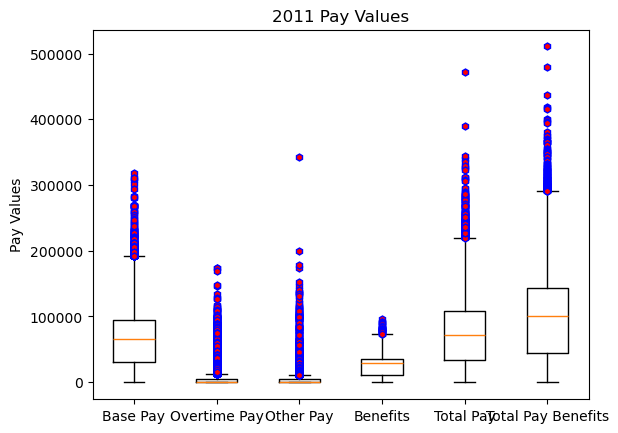

In [24]:
data_plotting = [base_pay, overtime_pay, other_pay, benefits, total_pay, tpb]
treatment = ['Base Pay', 'Overtime Pay', 'Other Pay', 'Benefits', 'Total Pay', 'Total Pay Benefits']
fig1, ax1 = plt.subplots()
ax1.set_ylabel("Pay Values")
plt.title("2011 Pay Values")
red_dot = dict(markerfacecolor="r", markersize = 5, marker="h", markeredgecolor="b")
ax1.boxplot(data_plotting, flierprops = red_dot, labels=treatment, widths = 0.5, vert = True)

plt.show()

In [25]:
filtered_2011 = df_2011[df_2011['BasePay'] <= upper_q]

filtered_2011 = filtered_2011[(filtered_2011['BasePay'] > 0) & 
                          (filtered_2011['BasePay'] <= 176422.22499999998)]


In [26]:
filtered_2011 = df_2011[df_2011['OvertimePay'] <= upper_q]

filtered_2011 = filtered_2011[(filtered_2011['OvertimePay'] > 0) & 
                          (filtered_2011['OvertimePay'] <= 10537.599999999999)]


In [27]:
filtered_2011 = df_2011[df_2011['OtherPay'] <= upper_q]

filtered_2011 = filtered_2011[(filtered_2011['OtherPay'] > 0) & 
                          (filtered_2011['OtherPay'] <= 10144.325)]


In [28]:
filtered_2011 = df_2011[df_2011['TotalPay'] <= upper_q]

filtered_2011 = filtered_2011[(filtered_2011['TotalPay'] > 0) & 
                          (filtered_2011['TotalPay'] <= 201065.55999999997)]


In [29]:
filtered_2011

,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Status
113504,Manager IV,142365.01,0.0,0.00,54968.84,142365.01,197333.85,FT
113508,Manager IV,142365.01,0.0,0.00,54947.26,142365.01,197312.27,FT
113559,Manager III,141732.03,0.0,0.00,54827.40,141732.03,196559.43,FT
113612,Dep Dir II,142443.23,0.0,0.00,53561.99,142443.23,196005.22,FT
113618,Manager IV,142365.05,0.0,0.00,53545.22,142365.05,195910.27,FT
...,...,...,...,...,...,...,...,...
148621,Transit Operator,0.00,0.0,15.35,0.00,15.35,15.35,PT
148622,Senior Clerk,0.00,0.0,13.77,0.00,13.77,13.77,PT
148623,Attorney (Civil/Criminal),0.00,0.0,13.35,0.13,13.35,13.48,PT
148624,Senior Clerk,0.00,0.0,12.89,0.00,12.89,12.89,PT


In [30]:
cleaned_2011 = filtered_2011[filtered_2011['BasePay'] != 0].reset_index(drop=True)


In [31]:
cleaned_2011

,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Status
0,Manager IV,142365.01,0.0,0.00,54968.84,142365.01,197333.85,FT
1,Manager IV,142365.01,0.0,0.00,54947.26,142365.01,197312.27,FT
2,Manager III,141732.03,0.0,0.00,54827.40,141732.03,196559.43,FT
3,Dep Dir II,142443.23,0.0,0.00,53561.99,142443.23,196005.22,FT
4,Manager IV,142365.05,0.0,0.00,53545.22,142365.05,195910.27,FT
...,...,...,...,...,...,...,...,...
33628,Special Nurse,19.97,0.0,0.00,4.30,19.97,24.27,PT
33629,Public Service Trainee,21.48,0.0,0.86,0.22,22.34,22.56,PT
33630,Pool Lifeguard,17.26,0.0,0.00,4.04,17.26,21.30,PT
33631,IS Program Analyst-Assistant,6.04,0.0,10.05,2.30,16.09,18.39,PT


In [32]:
relative_counts = cleaned_2011['JobTitle'].value_counts(normalize=False)
relative_counts.head(50)

JobTitle
Transit Operator                  2447
Special Nurse                     1434
Registered Nurse                   951
Public Svc Aide-Public Works       912
Custodian                          797
Recreation Leader                  689
Patient Care Assistant             648
Deputy Sheriff                     534
Police Officer                     507
Public Service Trainee             493
HSA Sr Eligibility Worker          465
Police Officer 3                   458
Firefighter                        367
Porter                             356
General Laborer                    337
Senior Clerk                       311
Parking Control Officer            310
Gardener                           295
Clerk                              266
Licensed Vocational Nurse          235
Library Page                       232
Junior Clerk                       229
Senior Clerk Typist                219
Publ Svc Aide-Asst to Prof         218
Senior Administrative Analyst      215
Medical Evaluati

In [33]:
positive_job_titles = [
    'Special Nurse'
    'Registered Nurse'
    'Nurse Practitioner'
    'Licensed Vocational Nurse'
    'Nursing Assistant'
    'Nurse Manager'
    'Public Health Nurse'
    'Nursing Supervisor'
    'Clinical Nurse Specialist'
    'Nurses Staffing Assistant'
    'Nurse Midwife'
    'Nursery Specialist'
    'Nursing Supervisor Psychiatric'
    'Operating Room Nurse'
]

# Create a new binary column
cleaned_2011['JobTitle_Class'] = cleaned_2011['JobTitle'].str.upper().isin(positive_job_titles).astype(int)

# Display the updated DataFrame

cleaned_2011

,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Status,JobTitle_Class
0,Manager IV,142365.01,0.0,0.00,54968.84,142365.01,197333.85,FT,0
1,Manager IV,142365.01,0.0,0.00,54947.26,142365.01,197312.27,FT,0
2,Manager III,141732.03,0.0,0.00,54827.40,141732.03,196559.43,FT,0
3,Dep Dir II,142443.23,0.0,0.00,53561.99,142443.23,196005.22,FT,0
4,Manager IV,142365.05,0.0,0.00,53545.22,142365.05,195910.27,FT,0
...,...,...,...,...,...,...,...,...,...
33628,Special Nurse,19.97,0.0,0.00,4.30,19.97,24.27,PT,0
33629,Public Service Trainee,21.48,0.0,0.86,0.22,22.34,22.56,PT,0
33630,Pool Lifeguard,17.26,0.0,0.00,4.04,17.26,21.30,PT,0
33631,IS Program Analyst-Assistant,6.04,0.0,10.05,2.30,16.09,18.39,PT,0


In [34]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Select the columns to scale
columns_to_scale = ['TotalPay', 'OvertimePay', 'OtherPay', 'BasePay']

# Fit the scaler and transform the selected columns
cleaned_2011[columns_to_scale] = scaler.fit_transform(cleaned_2011[columns_to_scale])

[0] [33633]


/opt/anaconda3/envs/dev/lib/python3.10/site-packages/seaborn/categorical.py:645: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  g_vals = grouped_vals.get_group(g)


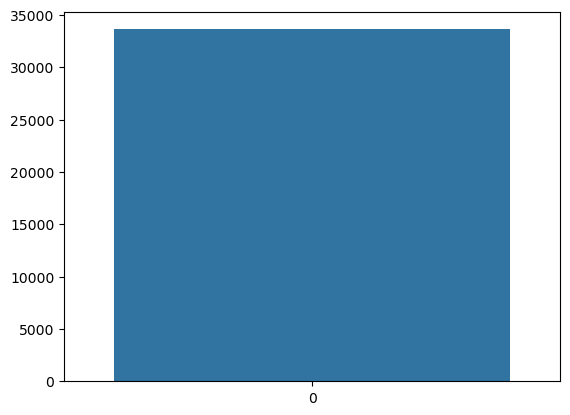

In [35]:
(unique, counts) = np.unique(cleaned_2011['JobTitle_Class'], return_counts=True)
print(unique, counts)
sns.barplot(x=unique, y = counts)
plt.show()

In [36]:
X = cleaned_2011.drop(columns=['TotalPay', 'JobTitle'])
y = cleaned_2011['TotalPay']

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y)


In [38]:
from sklearn.ensemble import RandomForestClassifier
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

ValueError: could not convert string to float: 'PT'

In [ ]:
from sklearn.model_selection import cross_val_score


model = LinearRegression()  

# Perform cross-validation
cv_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')

# Calculate the mean and standard deviation of the MSE
mean_mse = -cv_scores.mean()
std_mse = cv_scores.std()

print(f'Cross-Validated Mean MSE: {mean_mse}')
print(f'Cross-Validated MSE Standard Deviation: {std_mse}')

Cross-Validated Mean MSE: 2.637505751834021e-31
Cross-Validated MSE Standard Deviation: 2.1715596674587846e-31


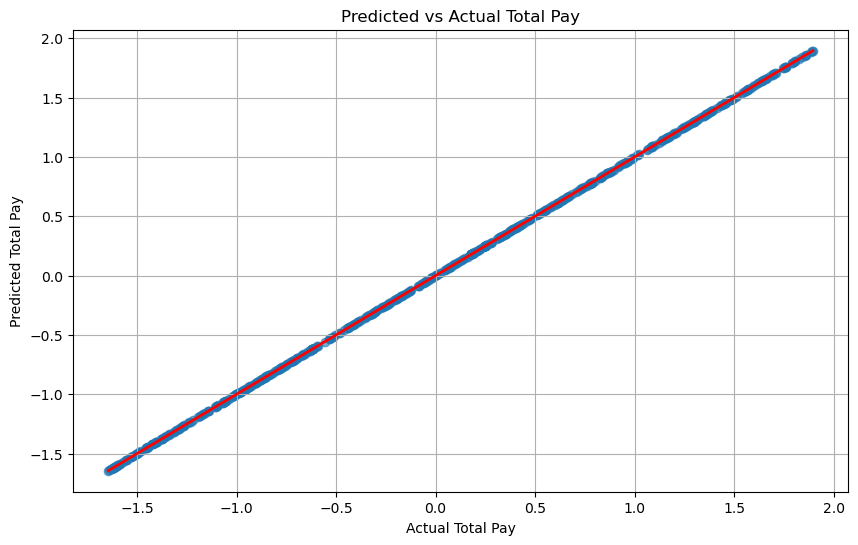

In [ ]:
import matplotlib.pyplot as plt

# Plot predictions vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.xlabel('Actual Total Pay')
plt.ylabel('Predicted Total Pay')
plt.title('Predicted vs Actual Total Pay')
plt.grid()
plt.show()

In [ ]:
model = LogisticRegression(random_state=9)

In [ ]:
X = cleaned_2011.drop(columns=['JobTitle_Class', 'JobTitle'])
y = cleaned_2011['JobTitle_Class']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [ ]:
lr = model.fit(X_train, y_train)


In [ ]:
train_pred = model.predict(X_train)
test_pred = lr.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix


In [ ]:
training_matrix = confusion_matrix(y_train, train_pred)
print(training_matrix)

[[1548    8]
 [ 211   11]]


In [ ]:
test_matrix = confusion_matrix(y_test, test_pred)
print(test_matrix)

[[504   6]
 [ 81   2]]


In [ ]:
train_report = classification_report(y_train, train_pred)
print(train_report)

              precision    recall  f1-score   support

           0       0.88      0.99      0.93      1556
           1       0.58      0.05      0.09       222

    accuracy                           0.88      1778
   macro avg       0.73      0.52      0.51      1778
weighted avg       0.84      0.88      0.83      1778



In [ ]:
test_report = classification_report(y_test, test_pred)
print(test_report)

              precision    recall  f1-score   support

           0       0.86      0.99      0.92       510
           1       0.25      0.02      0.04        83

    accuracy                           0.85       593
   macro avg       0.56      0.51      0.48       593
weighted avg       0.78      0.85      0.80       593



In [ ]:
print("Mean Squared Error:", mean_squared_error(y_test, test_pred))
print("R^2 Score:", r2_score(y_test, test_pred))

Mean Squared Error: 0.1467116357504216
R^2 Score: -0.2187810063784552


In [ ]:
print("Mean Squared Error:", mean_squared_error(y_train, train_pred))
print("R^2 Score:", r2_score(y_train, train_pred))

Mean Squared Error: 0.12317210348706412
R^2 Score: -0.12723198777183353


In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[477  33]
 [ 49  34]]
              precision    recall  f1-score   support

           0       0.91      0.94      0.92       510
           1       0.51      0.41      0.45        83

    accuracy                           0.86       593
   macro avg       0.71      0.67      0.69       593
weighted avg       0.85      0.86      0.86       593



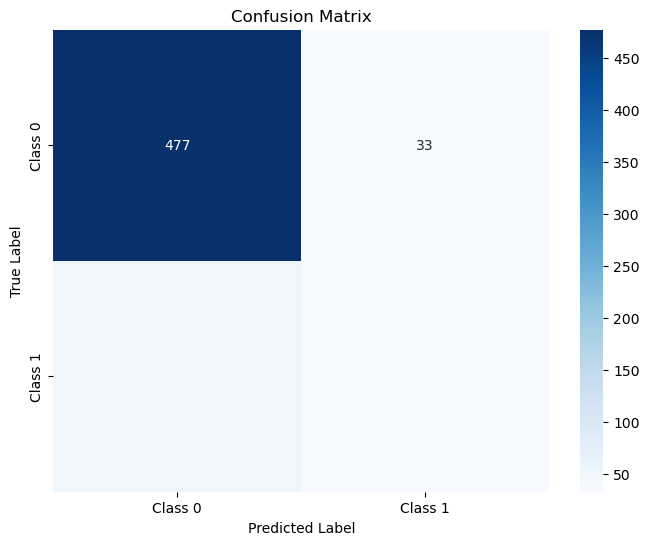

In [ ]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))

# Create a heatmap using Seaborn
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])

# Set titles and labels
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Show the plot
plt.show()

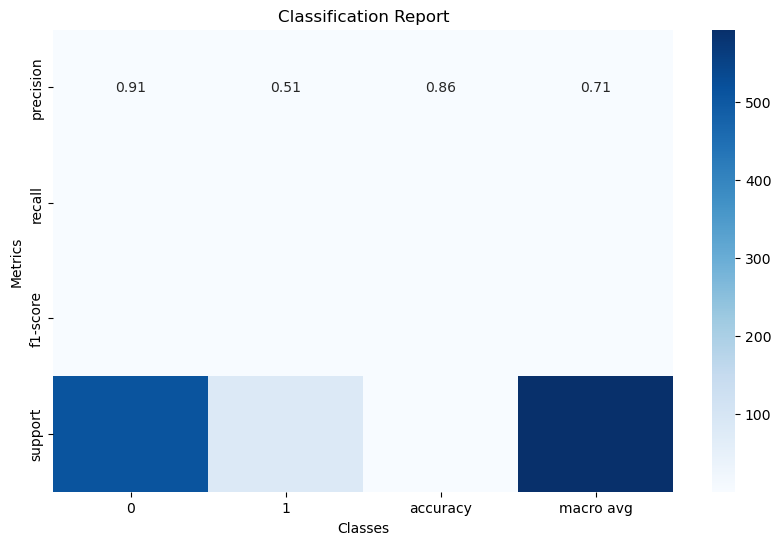

In [ ]:
# Generate the classification report
report = classification_report(y_test, y_pred, output_dict=True)

# Convert the report to a DataFrame
report_df = pd.DataFrame(report).transpose()

# Set up the matplotlib figure
plt.figure(figsize=(10, 6))

# Create a heatmap using Seaborn
sns.heatmap(report_df.iloc[:-1, :].T, annot=True, fmt='.2f', cmap='Blues')

# Set titles and labels
plt.title('Classification Report')
plt.xlabel('Classes')
plt.ylabel('Metrics')

# Show the plot
plt.show()